In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#loading the dataset
data=pd.read_csv('/content/drive/MyDrive/Practices/Salary_Data.csv')
data

#EDA of Dataset
data.info()



## now, drop all null values
data.dropna(inplace=True)
data







In [ ]:
#  Drop duplicate rows
data.drop_duplicates(inplace=True)
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6623,43.0,Female,Master's Degree,Digital Marketing Manager,15.0,150000.0
6624,27.0,Male,High School,Sales Manager,2.0,40000.0
6625,33.0,Female,Bachelor's Degree,Director of Marketing,8.0,80000.0
6628,37.0,Male,Bachelor's Degree,Sales Director,7.0,90000.0


In [ ]:
data.describe()

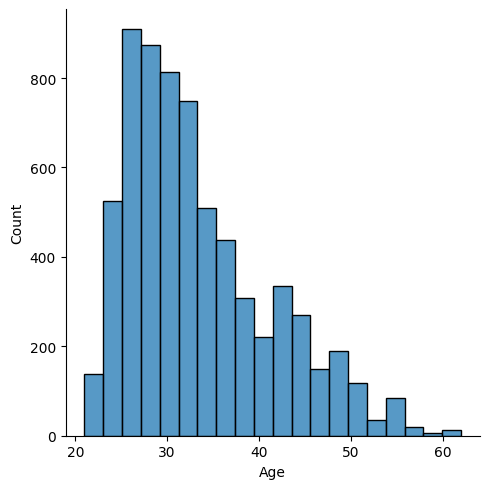

In [ ]:
# Analysis all the columns
sns.displot(x = 'Age', data=data, bins=20)
plt.show()

In [ ]:
sns.displot(x = 'Years of Experience', data=data, bins=20)
plt.show()

In [ ]:
sns.displot(x = 'Salary', data=data, bins=20)
plt.show()

In [ ]:
data.head()

## **Task: Is there any relation between YOE and Salary?**

In [1]:
plt.scatter(x = 'Years of Experience',y='Salary', data=data)
plt.xlabel('Years of Experience', fontsize=20)
plt.ylabel('Salary', fontsize=20)
plt.title('YOE vs Salary')
plt.show()

NameError: ignored

**It means, some records have zero salary - need to check them. and there generally its increasing with YOE. For more clearity, we will check in correlation**

In [ ]:
sns.countplot(x = 'Years of Experience', data=data)
plt.xticks(rotation=45)
plt.show()

**it means, most records are present for YOE 2 years.**

# **Task: How many Job Title are there? and for which Job Title most and less salary is given**

In [ ]:
data['Job Title'].nunique()

**it means, there were total 191 Job Titles are there.**

In [ ]:
## Find top 10 according to their number of records
data['Job Title'].value_counts()[:10]

In [ ]:
data['Job Title'].value_counts()[:10].index

In [ ]:
sns.barplot(x = data['Job Title'].value_counts()[:10].index,
            y = data['Job Title'].value_counts()[:10].values)
plt.xticks(rotation=90)
plt.xlabel('Job Title')
plt.ylabel('Total Number of records')
plt.title('Top 10 Job Title according to their number of records')
plt.show()

In [ ]:
## Now, finding top 10 max and min salary Job Title

max_salary_job_title = data.groupby('Job Title')[['Salary']].max().reset_index()
min_salary_job_title = data.groupby('Job Title')[['Salary']].min().reset_index()

In [ ]:
max_salary_job_title = max_salary_job_title.sort_values(by = ['Salary'], ascending=False)
max_salary_job_title = max_salary_job_title.head(10)
min_salary_job_title = min_salary_job_title.sort_values(by = ['Salary'])
min_salary_job_title = min_salary_job_title.head(10)

In [ ]:
sns.barplot(x = 'Job Title', y='Salary', data=max_salary_job_title)
plt.xticks(rotation=90)
plt.title('Top 10 Job Titles those offer max salary')
plt.show()

**it means, maximum salary is provided to CTO of companies**

In [ ]:
sns.barplot(x = 'Job Title', y='Salary', data=min_salary_job_title)
plt.xticks(rotation=90)
plt.title('Top 10 Job Titles those offer min salary')
plt.show()

**it means, min salary is offered to junior business Operations Analyst**

In [ ]:
plt.figure(figsize=(18,12))
sns.barplot(x = 'Years of Experience', y='Salary', hue='Gender',data=data, ci=1)
plt.xticks(rotation=90)
plt.show()

Some important conslusions:

For YOE 26, only male records are there
For YOE 33 and 34, only female records are there.

In [ ]:
data.head()

# **Task: is higher Education offers more Salary?**

In [ ]:
data['Education Level'].unique()

First we have to clean this data,

Bachelor's and Bachelor's Degree are same.
Master's and Master's Degree are same.
PhD and phD are same

In [ ]:
## Data Cleaning for Education Level column
data['Education Level'] = data['Education Level'].replace({"Bachelor's Degree": "Bachelor's",
                                                           "Master's Degree": "Master's",
                                                           "PhD" : "phD"})
data

In [ ]:
## First represent their count of records of Education Level
sns.barplot(x = data['Education Level'].value_counts().index,
            y = data['Education Level'].value_counts().values)
plt.title('Education Level Records present')
plt.xlabel('Education Level')
plt.ylabel('Number of records present')
plt.show()

it means, most records are present for Bachelor's

In [ ]:
## First represent their count of records of Education Level based on their gender
sns.countplot(x = 'Education Level',
              data=data,
              hue='Gender')
plt.title('Education Level Records present')
plt.xlabel('Education Level')
plt.ylabel('Number of records present')
plt.show()

it means, more females are there in Master's

In [ ]:
## Now, find relation between Education Level and Salary
education_level_salary = data.groupby('Education Level')[['Salary']].max().reset_index()
sns.barplot(x = 'Education Level',
            y = 'Salary',
            data = education_level_salary)
plt.show()

it means, most salary is given to Bachelor's degree peoples

# **Task: Find Correlation**

In [ ]:
## first convert Gender and Education Level to int
data['Gender'] = data['Gender'].replace({'Male': 0,'Female':1})
data['Education Level'] = data['Education Level'].replace({"Bachelor's" : 0,
                                                           "Master's" : 1,
                                                           "High School": 2,
                                                           "phD" : 3})
data

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap='BrBG')
plt.show()

it means, the Age and YOE is highly correlated that is genunie.

In [ ]:
sns.pairplot(data)

it means, there is positive correlation between YOE and Salary, Age and Salary.

# Project Name - Salary_Data_Eda
# Project By :- Adarsh Ashok Vardhan